# E-commerce Sales Analysis & Customer Segmentation
---
## Project Overview and Goal
The goal of this project is to analyze the sales data of an online retail company to identify trends, understand customer behavior, and provide actionable insights to improve sales and marketing strategies. You will act as a data analyst for a fictional e-commerce store called "Trendify."

## Business Context
Trendify is an online retailer that sells a variety of products. The company has been collecting sales data for the past year and wants to leverage this data to make more informed business decisions. They are particularly interested in understanding which products are selling well, who their most valuable customers are, and how they can optimize their marketing efforts.

## Key Question
1. What are the overall sales trends on a monthly and quarterly basis?
2. Which are the top 10 best-selling products by revenue and quantity?
3. Who are the top 10 most valuable customers?
4. What is the geographical distribution of sales?
5. How can we segment our customers based on their purchasing behavior?

## Dataset
"Online Retail" dataset from the UCI Machine Learning Repository

---
#### Import Library

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

#### Read the dataset

In [2]:
sales = pd.read_csv("online_retail_II.csv", engine='pyarrow')

# See the top 5 data
sales.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
# See the dataset information
print(sales.info())
print()
print("Missing values on dataset:\n", sales.isna().sum())
print()
print("Duplicate values on dataset:\n", sales.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype        
---  ------       --------------    -----        
 0   Invoice      1067371 non-null  object       
 1   StockCode    1067371 non-null  object       
 2   Description  1062989 non-null  object       
 3   Quantity     1067371 non-null  int64        
 4   InvoiceDate  1067371 non-null  datetime64[s]
 5   Price        1067371 non-null  float64      
 6   Customer ID  824364 non-null   float64      
 7   Country      1067371 non-null  object       
dtypes: datetime64[s](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB
None

Missing values on dataset:
 Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

Duplicate values on dataset:
 34335


The dataset contain 8 column and 1.067.371 rows. <br>
There are 243.007 missing values of Customer ID and 4.382 missing values of product Description. <br>
There are 34.335 duplicate records in the dataset. <br>
The column 'Customer ID' has the wrong data type.

#### Data Cleaning

In [4]:
# Drop missing values
sales = sales.dropna()
sales.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [5]:
# Drop duplicate
sales = sales.drop_duplicates()
sales.duplicated().sum()

np.int64(0)

In [6]:
# Convert columns data types into the right one
sales['Customer ID'] = sales['Customer ID'].astype('object')
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797885 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype        
---  ------       --------------   -----        
 0   Invoice      797885 non-null  object       
 1   StockCode    797885 non-null  object       
 2   Description  797885 non-null  object       
 3   Quantity     797885 non-null  int64        
 4   InvoiceDate  797885 non-null  datetime64[s]
 5   Price        797885 non-null  float64      
 6   Customer ID  797885 non-null  object       
 7   Country      797885 non-null  object       
dtypes: datetime64[s](1), float64(1), int64(1), object(5)
memory usage: 54.8+ MB


In [7]:
# Create new column to count the total price
sales['Total Sales'] = np.round((sales['Price'] * sales['Quantity']), 2)
sales.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [8]:
# Extract Hour from invoice date
sales['Hour'] = sales['InvoiceDate'].dt.hour

# Extract Day from invoice date
sales['Day'] = sales['InvoiceDate'].dt.day

# Extract Month from invoice date
sales['Month'] = sales['InvoiceDate'].dt.month

# Extract year from invoice date
sales['Year'] = sales['InvoiceDate'].dt.year

# Check the dataset
sales.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Sales,Hour,Day,Month,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,7,1,12,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,7,1,12,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,7,1,12,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,7,1,12,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,7,1,12,2009


In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797885 entries, 0 to 1067370
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype        
---  ------       --------------   -----        
 0   Invoice      797885 non-null  object       
 1   StockCode    797885 non-null  object       
 2   Description  797885 non-null  object       
 3   Quantity     797885 non-null  int64        
 4   InvoiceDate  797885 non-null  datetime64[s]
 5   Price        797885 non-null  float64      
 6   Customer ID  797885 non-null  object       
 7   Country      797885 non-null  object       
 8   Total Sales  797885 non-null  float64      
 9   Hour         797885 non-null  int32        
 10  Day          797885 non-null  int32        
 11  Month        797885 non-null  int32        
 12  Year         797885 non-null  int32        
dtypes: datetime64[s](1), float64(2), int32(4), int64(1), object(5)
memory usage: 73.0+ MB


#### Exploratory Data Analysis

In [10]:
# Sales trend
sales_trend = sales.groupby(['Year', 'Month'])['Total Sales'].sum().reset_index()

# Combine Year and Month into a single datetime column
sales_trend['Period'] = pd.to_datetime(sales_trend[['Year', 'Month']].assign(DAY=1))

sales_trend.head()

,Year,Month,Total Sales,Period
0,2009,12,660125.10,2009-12-01
1,2010,1,530436.51,2010-01-01
2,2010,2,487596.42,2010-02-01
3,2010,3,633419.31,2010-03-01
4,2010,4,558007.83,2010-04-01


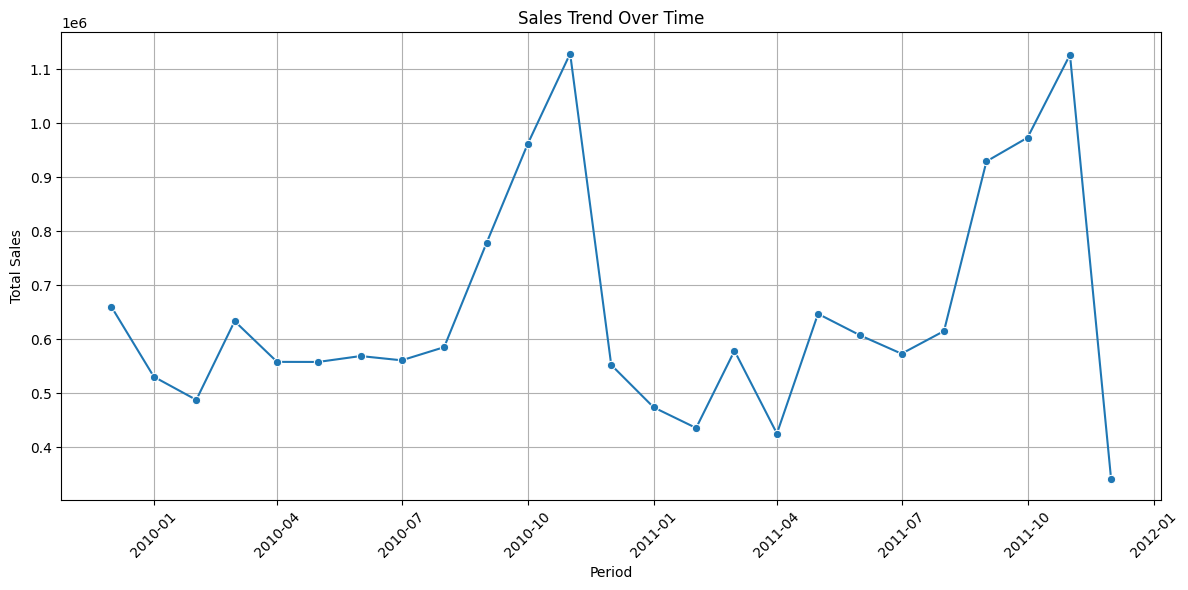

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trend, x='Period', y='Total Sales', marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Period')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Top Products
top_products = sales.groupby(['StockCode', 'Description'])[['Quantity', 'Total Sales']].sum().reset_index()

# Top products by Total Sales
top_product_sales = top_products.sort_values(by='Total Sales', ascending=False)
# Get top 10
top_10_sales = top_product_sales.head(10)

# Top products by Quantity sold
top_product_qty = top_products.sort_values(by='Quantity', ascending=False)
# Get top 10
top_10_qty = top_product_qty.head(10)

C:\Users\dkpc2\AppData\Local\Temp\ipykernel_16248\3690475079.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10_sales, y='Description', x='Total Sales', palette='Blues_d')


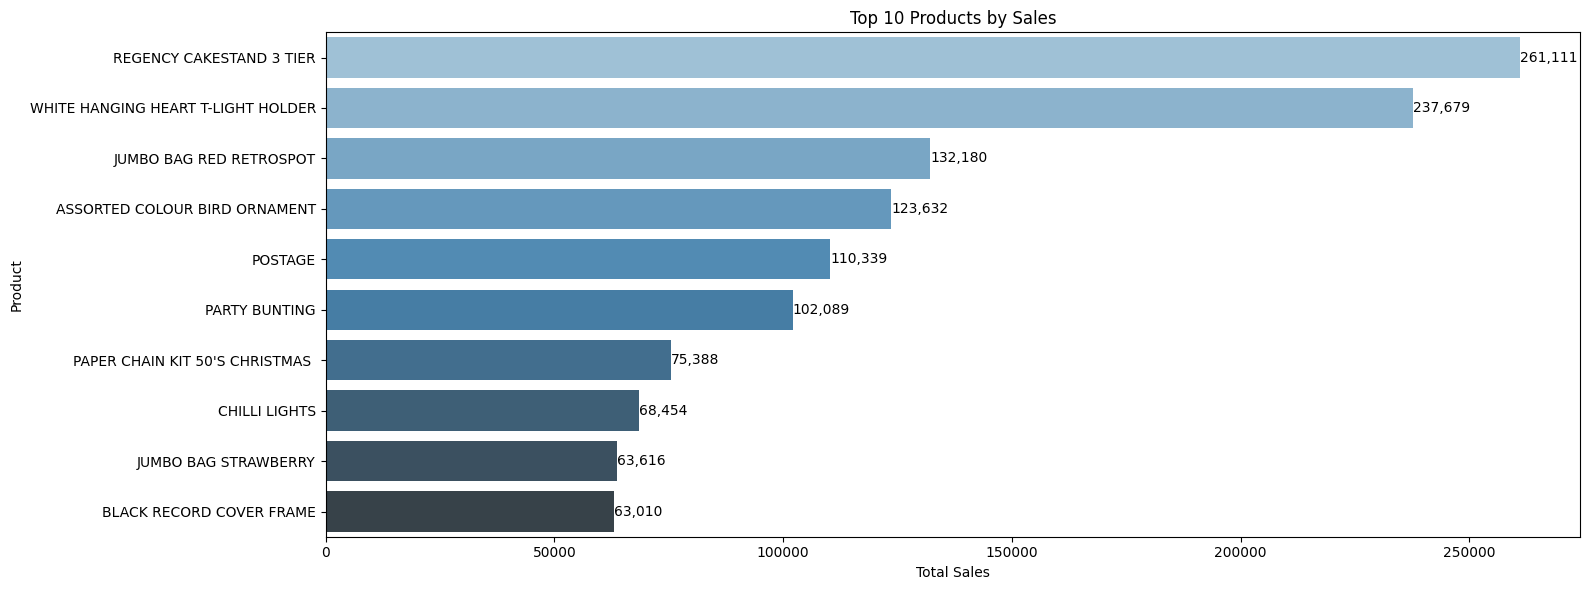

In [13]:
# Top 10 Products by Sales
plt.figure(figsize=(16, 6))
ax = sns.barplot(data=top_10_sales, y='Description', x='Total Sales', palette='Blues_d')

# Add data labels
for i, value in enumerate(top_10_sales['Total Sales']):
    plt.text(value, i, f'{value:,.0f}', va='center')  # format with comma, no decimal

plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


C:\Users\dkpc2\AppData\Local\Temp\ipykernel_16248\98437055.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10_qty, y='Description', x='Quantity', palette='Blues_d')


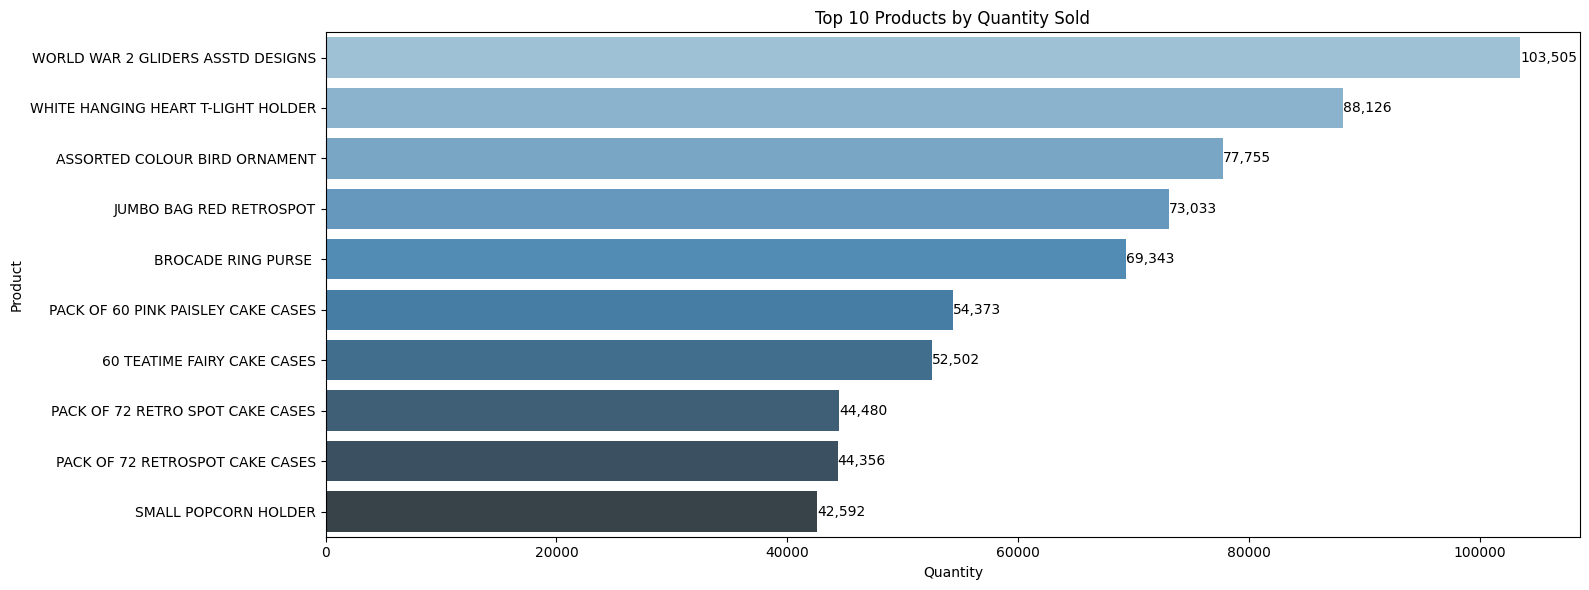

In [14]:
# Top 10 Products by Sales
plt.figure(figsize=(16, 6))
ax = sns.barplot(data=top_10_qty, y='Description', x='Quantity', palette='Blues_d')

# Add data labels
for i, value in enumerate(top_10_qty['Quantity']):
    plt.text(value, i, f'{value:,.0f}', va='center')  # format with comma, no decimal

plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Quantity")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


In [15]:
# Top Country Contributed to sales
top_country = sales.groupby(['Country'])['Total Sales'].sum().reset_index()
top_country = top_country.sort_values(by='Total Sales', ascending=False)
top_10_country = top_country.head(10)

C:\Users\dkpc2\AppData\Local\Temp\ipykernel_16248\3177377039.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10_country, y='Country', x='Total Sales', palette='viridis')


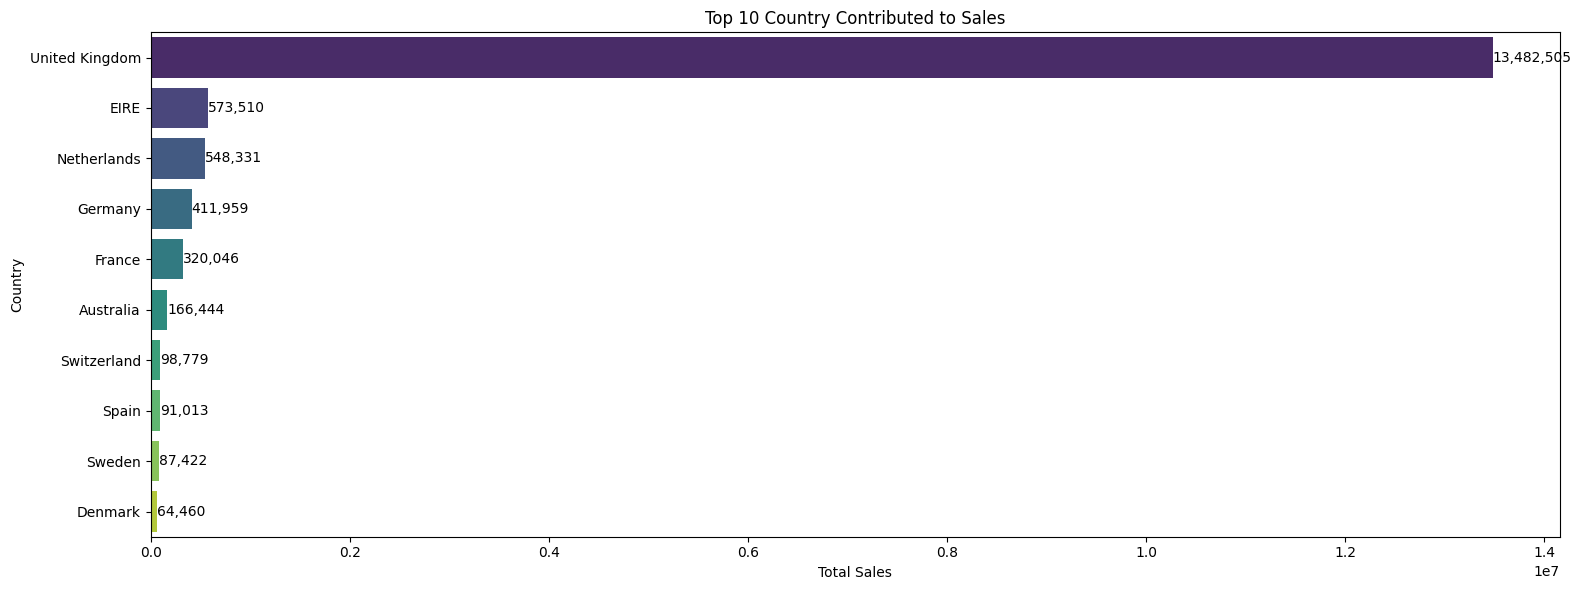

In [16]:
# Top Country Contributed to sales
plt.figure(figsize=(16, 6))
ax = sns.barplot(data=top_10_country, y='Country', x='Total Sales', palette='viridis')

# Add data labels
for i, value in enumerate(top_10_country['Total Sales']):
    plt.text(value, i, f'{value:,.0f}', va='center')  # format with comma, no decimal

plt.title("Top 10 Country Contributed to Sales")
plt.xlabel("Total Sales")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

#### Customer Recency, Frequency, Monetary value, and segmentation

In [17]:
# Snapshot date = date of last purchase in dataset + 1 day
snapshot_date = sales['InvoiceDate'].max() + pd.Timedelta(days=1)

# RFM Metrics
rfm = sales.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'Invoice': 'nunique',                                   # Frequency
    'Total Sales': 'sum'                                      # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

# RFM scoring (higher is better, so lower recency gets higher score)
rfm['R'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Show the data
rfm.head()

,Customer ID,Recency,Frequency,Monetary,R,F,M
0,12346.0,326,17,-51.74,2,5,1
1,12347.0,2,8,4921.53,5,4,5
2,12348.0,75,5,2019.40,3,3,4
3,12349.0,19,5,4404.54,4,3,5
4,12350.0,310,1,334.40,2,1,2


#### Customer Clustering using K-Means

In [18]:
# Import library for clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import plotly.express as px

In [19]:
# Select RFM features
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]

# Normalize the values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

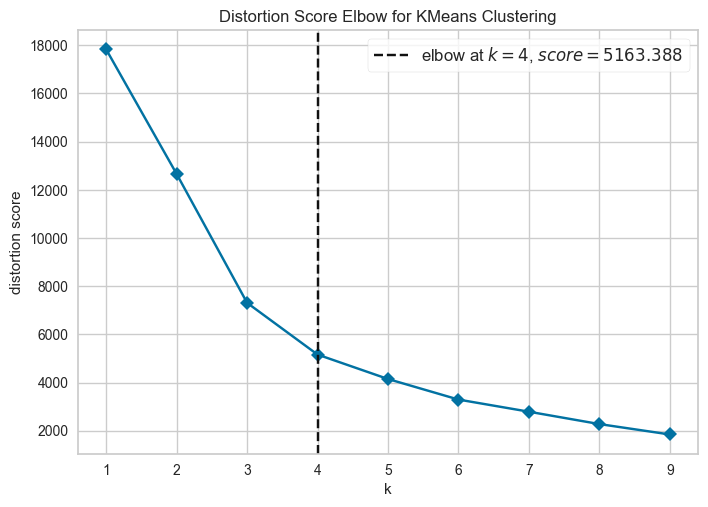

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
sse = []  # Sum of Squared Errors

# Use KElbowVisualizer with KMeans
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1, 10), metric='distortion', timings=False)

# Fit the visualizer with the scaled RFM data
visualizer.fit(rfm_scaled)
visualizer.show()

In [21]:
# Fit KMeans with chosen k (k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [22]:
# Group RFM by cluster
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Customer ID': 'count'
}).rename(columns={'Customer ID': 'Count'}).reset_index()

print(cluster_summary)


   Cluster     Recency   Frequency       Monetary  Count
0        0  466.260187    2.579283     606.487860   2037
1        1   65.996378    8.783959    2795.071524   3865
2        2   22.805556  128.972222   72113.334167     36
3        3    3.500000  257.250000  413886.007500      4


From the result given, there are 4 customer cluster. <br>
1. Cluster 0: <br>
Customers that haven't made purchase in a long time, have few purchases on average, and spent a little. This cluster represents Lapsed or At-Risk Low-Value Customers.
2. Cluster 1: <br>
Customers that purchase was relatively recent, purchase somewhat regularly, and contribute a decent amount of revenue. This cluster represents Active & Regular Customers or Potential Loyalists.
3. Cluster 2:
Customers that purchase very recently, purchase purchase very frequently, and spend a significant amount of money. This cluster represents Champions or High-Value Loyal Customers.
4. Cluster 3:
Customers that last purchase was exceptionally recent, purchase incredibly frequently, and spent exceptionally high. This cluster represents  Top VIP/Whale Customers.

In [23]:
# Visualize Clustering on 3D Scatter plot
fig = px.scatter_3d(
    rfm,
    x='Recency',
    y='Frequency',
    z='Monetary',
    color='Cluster',
    title='3D RFM Cluster Visualization (Interactive)',
    size_max=18,
    opacity=0.7
)
fig.show()

#### Answers to the Key Question:
1. What are the overall sales trends on a monthly and quarterly basis?

2. Which are the top 10 best-selling products by revenue and quantity?

3. Who are the top 10 most valuable customers?

4. What is the geographical distribution of sales?

5. How can we segment our customers based on their purchasing behavior?


In [27]:
# Export dataset for data visualization in Power BI
sales.to_csv("Cleaned Sales Data.csv", index=False)
rfm.to_csv("RFM Analysis.csv", index=False)